<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/1_4_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Linear Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.4.1 Logistic Regression

### 1.4.1.1 Introduction to Logistic Regression

#### What is Logistic Regression?

- **Logistic regression** is a classification algorithm
- Let's say we have a telecommunications dataset that we'd like to analyze in order to understand which customers might leave us next month
- Each row represents one customer
- The target variable is `churn`
    - Indicates which customers left within the last month
- The dataset contains information about services that each customer has signed up for, customer account information and demographic information

In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%203/data/ChurnData.csv'

data = pd.read_csv(data_url)
data = data.head(5)
data = data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]
data

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0.0


- In logistic regression, we use one or more independent variables to predict an outcome represented by the dependent variable
- In linear regression we predicted a continuous variable
- In logistic regression we predict a binary variable, which can be coded as 0 or 1
    - The independent variables should be continuous or dummy/indicator encoded
    - Can also be used for multi-class classification (not covered in this video)

#### Logistic Regression Applications

- Predicting the probability of a person having a heart attack
- Predicting the mortality in injured patients
- Predicting customer's propensity to purchase a product or halt a subscription
- Predicting the probability of failure of a given process or product
- Predicting the likelihood of a homeowner defaulting on a mortgage

In each case, we don't just predict the class of each case, we also predict the probability of a case belonging to a specific class.

- There are different machine algorithms which can classifiy or estimate a variable
- Why choose logistic regression?
 1. If your data is binary
 2. If you need probabilistic results
 3. When you need a linear decision boundary
   - That boundary can be a line, a plane, or a hyperplane
   - Note that it is also possible to achieve a complex decision boundary using polynomial processing (out of scope for this video)
 4. If you need to understand the impact of a feature
   - You can select the best features based on the statistical significance of the logistic regression model coefficients or parameters ($\theta_1$, $\theta_2$, ...)
   - It allows us to understand the impact an independent variable has on the dependent variable while contolling other independent variables

$$
\begin{align}
\mathbf{X} &\in \mathbb{R} \\
\mathbf{y} &\in \{0,1\}
\end{align}
$$

<br>

$$
\widehat{\mathbf{y}} = \mathbf{P}\left(\mathbf{y}=1|\mathbf{x}\right)
$$

<br>

$$
\mathbf{P}\left(\mathbf{y}=0|\mathbf{x}\right) = 1 - \mathbf{P}\left(\mathbf{y}=1|\mathbf{x}\right)
$$

### 1.4.1.2 Logistic Regression vs. Linear Regression

In [3]:
data

,tenure,age,address,income,ed,employ,equip,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0,0.0


- $\mathbf{y}$ is the labels vector
- $\widehat{\mathbf{y}}$ is the vector of the values predicted by our model
- If we map the target labels to integer values, $\{0,1\}$, can we use linear regression to solve this problem?
    - No

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear.png'/>

- In the above graph, $\widehat{\mathbf{y}} = a + bx_1$
- Can we use the same technique to predict a categorical target such as churn?
    - Let's try:

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear2.png'/>

- The vector, $\theta$ is the vector of parameters
    - also called the **weights factor** or **confidences** of the equation
- $\mathbf{X}$ are all the feature sets
- Our line has equation $\theta^{T}\mathbf{X} = -1 + 0.1 x_{1}$
- Now, we use this regression line to predict the churn of a new customer
- Below, we predict the class of someone with `Age = 13`

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear3.png'/>

- Class 0 is predicted
    - But, since we used linear regression, we don't have a probability

<img src='https://raw.githubusercontent.com/PaulToronto/IBM---AI-Engineering-Professional-Certificate/refs/heads/main/images/linear4.png'/>

- We used a **threshold** of 0.5
    - No matter how big the number is, as long as it is bigger than 0.5, Class 0 is predicted
    - No matter how small the number is, as long as it is less than 0.5, Class 1 is predicted
- There is no difference between a customer who has a value of 1 or 1000, the outcome is still the same

#### The Simoid Function (aka The Logistic Function)

What we need is a method that would give us a probability of falling in a particular class
    - Instead of using $\theta^{T}\mathbf{X}$, use is a function called `sigmoid`

$$
\begin{align}
\sigma\left(\theta^{T}\mathbf{X}\right) &= \sigma\left(\theta_{0} + \theta_{1}x_{1} + \dots\right) \\
\sigma\left(\theta^{T}\mathbf{X}\right) &= \frac{1}{1 + e^{-\theta^{T}\mathbf{X}}}
\end{align}
$$

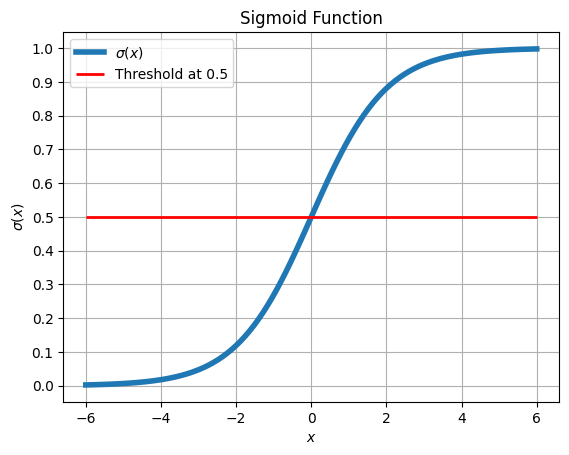

In [4]:
x = np.linspace(-6, 6, 100)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

plt.plot(x, sigmoid(x), linewidth=4, label='$\sigma(x)$')
plt.hlines(0.5, -6, 6, color='red', linewidth=2, label='Threshold at 0.5')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Sigmoid Function')
plt.legend();

#### What is the output of our model when we use logistic regression?

Now,

$$
\widehat{\mathbf{y}} = \sigma(\theta^{T}\mathbf{X})
$$

and this gives us

$$
P(\widehat{y}=1|x)
$$

- `P(Churn=1|income, age) = 0.8`
- `P(Churn-0|income, age) = 1 - 0.8 = 0.2`
- Now our job is to train the model to set its parameter values in such a way that our model is a good estimate of $P(\mathbf{y}=1|x)$

#### The Training Process

$$
\sigma\left(\theta^{T}\mathbf{X}\right) \rightarrow \mathbf{P}\left(\mathbf{y} = \mathbf{1}|\mathbf{x}\right)
$$

1. Initialize $\theta$
    - $\theta = [-1, 2]$
2. Calculate $\widehat{\mathbf{y}} =\sigma(\theta^{T}\mathbf{X})$ for a customer
    - $\widehat{\mathbf{y}} = \sigma([-1, 2] \cdot [2, 5]) = 0.997$
    - this is the probability that the customer belongs to the default class


In [5]:
sigmoid(np.array([-1, 2]).dot(np.array([2, 4])))

0.9975273768433653

3. Compare the output, $\widehat{\mathbf{y}}$ with $\mathbf{y}$ and record it as error:
    - `Error = 1 - 0.9997 = 0.0003`

4. Calculate the error for all customers.
 - Cost = $J(\theta)$
 - The cost shows how poorly the model is estimating the labels correctly
   - The lower the cost, the better the model
   - We want to minimize the cost
5. Change $\theta$ to reduce the cost
 - $\theta_{new}$
6. Go back to step 2 and iterate until the cost is low enough

#### Two questions arise from this

1. How can we change the values of $\theta$ so that the cost is reduced?
    - Gradient Descent
        - This is not the only way
2. When should we stop the interations?
    - There are various ways to do this, but essentially, you stop when the cost is satisfactory

### 1.4.1.3 Logistic Regression Training